In [1]:
import pandas as pd
import glob
import os
import pickle

# Math
import numpy as np

# plotting packages
import matplotlib.pyplot as plt   # Import matplotlib
from IPython.display import display # this is to display variables in mid cell with a better visual than print

# Datetime
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

#Multithread
from concurrent.futures import ThreadPoolExecutor, as_completed

# Finance
import talib as ta

# misc
import pickle as pk #this is to easlily save variables, classes etc for safe storing.

In [4]:
# this has to be separated or the formatting won't work
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = [15, 5]

In [1]:
#gittest passwork

In [5]:
test = [2,3,1,4,5,1,3,4,5] 
np.maximum.accumulate(test)

array([2, 3, 3, 4, 5, 5, 5, 5, 5])

# Strings

[Python 3's f-Strings: An Improved String Formatting Syntax (Guide)](https://realpython.com/python-f-strings/)


In [8]:
a = np.pi
f'{a:.2f}'

'3.14'

# Misc

In [6]:
list1 = list('abc')
list2 = list('123')
list(zip(list1, list2))

[('a', '1'), ('b', '2'), ('c', '3')]

# Multithread

In [7]:
URLS = ['http://www.foxnews.com/',
        'http://www.cnn.com/',
        'http://europe.wsj.com/',
        'http://www.bbc.co.uk/',
        'http://some-made-up-domain.com/']

# Retrieve a single page and report the URL and contents
def load_url(url, timeout):
    with urllib.request.urlopen(url, timeout=timeout) as conn:
        return conn.read()

# We can use a with statement to ensure threads are cleaned up promptly
with ThreadPoolExecutor(max_workers=5) as executor:
    # Start the load operations and mark each future with its URL
#     future_to_url = {executor.submit(load_url, url, 60): url for url in URLS}
    future = [executor.submit(load_url, url, 60) for url in URLS]

In [8]:
future

[<Future at 0x7fccc841f780 state=finished raised NameError>,
 <Future at 0x7fccc841f860 state=finished raised NameError>,
 <Future at 0x7fccc841f940 state=finished raised NameError>,
 <Future at 0x7fccc841fac8 state=finished raised NameError>,
 <Future at 0x7fccc841fba8 state=finished raised NameError>]

In [9]:
for future in as_completed(future_to_url):
    url = future_to_url[future]
    try:
        data = future.result()
    except Exception as exc:
        print('%r generated an exception: %s' % (url, exc))
    else:
        print('%r page is %d bytes' % (url, len(data)))

NameError: name 'future_to_url' is not defined

In [ ]:
URLS = ['http://www.foxnews.com/',
        'http://www.cnn.com/',
        'http://europe.wsj.com/',
        'http://www.bbc.co.uk/',
        'http://some-made-up-domain.com/']

# Retrieve a single page and report the URL and contents
def load_url(url, timeout):
    with urllib.request.urlopen(url, timeout=timeout) as conn:
        return conn.read()

# We can use a with statement to ensure threads are cleaned up promptly
with ThreadPoolExecutor(max_workers=5) as executor:
    # Start the load operations and mark each future with its URL
    future_to_url = {executor.submit(load_url, url, 60): url for url in URLS}
    
    for future in as_completed(future_to_url):
        url = future_to_url[future]
        try:
            data = future.result()
        except Exception as exc:
            print('%r generated an exception: %s' % (url, exc))
        else:
            print('%r page is %d bytes' % (url, len(data)))

In [ ]:
future_to_url

# Saving etc
Pickling will serialize your list (convert it, and it's entries to a unique byte string), so you can save it to disk. You can also use pickle to retrieve your original list, loading from the saved file.

So, first build a list, then use pickle.dump to send it to a file...

[Adapted From Stackoverflow](https://stackoverflow.com/questions/25464295/how-to-pickle-a-list)

In [5]:
mylist = list('abcd')
display (mylist)
with open('ZZ_savetest.pkl', 'wb') as f:
    pickle.dump(mylist, f)
with open('ZZ_savetest.pkl', 'rb') as f:
    mynewlist = pickle.load(f)
display(mynewlist)

['a', 'b', 'c', 'd']

['a', 'b', 'c', 'd']

# Pandas

## creating

In [11]:
 test = pd.DataFrame([list('abcd'), list('5678')], index = ['A', 'B'])

In [16]:
test.index.name = 'indexname'
test.index.names
test

,0,1,2,3
"[testt, fun]",,,,
A,a,b,c,d
B,5,6,7,8


In [17]:
 pd.DataFrame([list('abcd')],index = ['index']).

,0,1,2,3
index,a,b,c,d


In [26]:
test = pd.DataFrame([list('abcd')],index = ['index'])
test.index.rename('asd',inplace=True)
test

,0,1,2,3
asd,,,,
index,a,b,c,d


In [28]:
pd.concat([df,  pd.DataFrame([list('abcd')],index = ['NewRowName'],columns = df.columns)])

,A,B,C,D
2013-01-01 00:00:00,-0.289898,-0.96942,1.72222,-0.17074
2013-01-02 00:00:00,2.38141,-1.27413,-1.14515,1.36122
2013-01-03 00:00:00,0.157439,0.27254,1.7925,2.43372
2013-01-04 00:00:00,1.2334,2.04652,0.48642,-0.531851
2013-01-05 00:00:00,1.7397,-0.052827,-0.406638,-1.08752
2013-01-06 00:00:00,-1.56221,-0.515558,0.287614,-0.91205
index,a,b,c,d


In [ ]:
# dropping infs for nans
df.replace([np.inf, -np.inf], np.nan)

In [9]:
df

NameError: name 'df' is not defined

# Multiindex

In [7]:
arrays = [np.array(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux']),
        np.array(['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two'])]
arrays

[array(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
       dtype='<U3'),
 array(['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two'],
       dtype='<U3')]

In [8]:
test = pd.DataFrame(np.random.randn(3, 8),columns = arrays)
test

bar                 baz                 foo                 qux  \
        one       two       one       two       one       two       one   
0  0.234129  0.042092 -0.664568  0.392977 -0.469772 -1.682831  0.016709   
1  0.746730 -0.419420 -1.692573  1.100760 -0.227796  0.710326  1.141156   
2 -0.106952 -0.245204  1.127934 -0.063394  0.207477  0.137591  0.886294   

             
        two  
0 -0.358122  
1 -0.801943  
2 -0.565772

In [9]:
test[[['bar','one'], ['foo','one']]]

,bar,foo
,one,one
0,0.234129,-0.469772
1,0.746730,-0.227796
2,-0.106952,0.207477


In [78]:
multiidx = pd.MultiIndex.from_product([['1', '2'], ['a', 'b', 'c']], names = ['Num', 'Char'])
df = pd.DataFrame(np.random.randn(6,4),index = multiidx, columns = list('zxcv'))
df

z         x         c         v
Num Char                                        
1   a     0.677456 -0.419147 -1.365295  0.661735
    b    -0.166759  0.868929 -1.402580  0.874507
    c     0.967597  0.646739  0.026465 -0.276422
2   a    -0.302836  1.157907  0.591974  0.135203
    b    -0.318056 -2.335101 -0.865656 -0.172633
    c    -1.038155 -0.817655 -1.371557 -0.776593

In [106]:
multiidx = pd.MultiIndex.from_product([['1', '2'], ['a', 'b', 'c']], names = ['Num', 'Char'])
df = pd.DataFrame(index = multiidx, columns = list('zxcv'))
df

z    x    c    v
Num Char                    
1   a     NaN  NaN  NaN  NaN
    b     NaN  NaN  NaN  NaN
    c     NaN  NaN  NaN  NaN
2   a     NaN  NaN  NaN  NaN
    b     NaN  NaN  NaN  NaN
    c     NaN  NaN  NaN  NaN

In [92]:
colnames = df.columns.values
display(colnames)
indexNum = df.index.levels[0].values

array(['z', 'x', 'c', 'v'], dtype=object)

In [95]:
for num in indexNum:
    print (type(num))

<class 'str'>
<class 'str'>


In [116]:
df.loc[('1', 'a'),col] = 'fuuuu'
df

z    x    c      v
Num Char                      
1   a       2    4    6  fuuuu
    b     NaN  NaN  NaN    NaN
    c     NaN  NaN  NaN    NaN
2   a       2    4    6      8
    b     NaN  NaN  NaN    NaN
    c     NaN  NaN  NaN    NaN

In [119]:
multiidx = pd.MultiIndex.from_product([['1', '2'], ['a', 'b', 'c']], names = ['Num', 'Char'])
df = pd.DataFrame(index = multiidx, columns = list('zxcv'))
colnames = df.columns.values
indexNum = df.index.levels[0].values
display(colnames)
display(indexNum)
val = 1
for col in colnames:
    for num in indexNum:
        df.loc[(num, 'a'),col] = val
        val += 1
df

array(['z', 'x', 'c', 'v'], dtype=object)

array(['1', '2'], dtype=object)

z    x    c    v
Num Char                    
1   a       1    3    5    7
    b     NaN  NaN  NaN  NaN
    c     NaN  NaN  NaN  NaN
2   a       2    4    6    8
    b     NaN  NaN  NaN  NaN
    c     NaN  NaN  NaN  NaN

In [62]:
df.loc['1']

,z,x,c,v
Char,,,,
a,0.783238,-1.122938,-0.363436,0.106936
b,0.181142,-0.097636,0.240832,0.658479
c,0.057970,-1.015679,0.402710,-1.042318


In [63]:
df.loc[['1']]

z         x         c         v
Num Char                                        
1   a     0.783238 -1.122938 -0.363436  0.106936
    b     0.181142 -0.097636  0.240832  0.658479
    c     0.057970 -1.015679  0.402710 -1.042318

In [64]:
df.loc['1','z']

Char
a    0.783238
b    0.181142
c    0.057970
Name: z, dtype: float64

In [60]:
df.loc[['1'], ['z']]

z
Num Char          
1   a     0.783238
    b     0.181142
    c     0.057970

In [66]:
df.loc[['1'], ['z']] = [1,2,3]
df

z         x         c         v
Num Char                                        
1   a     1.000000 -1.122938 -0.363436  0.106936
    b     2.000000 -0.097636  0.240832  0.658479
    c     3.000000 -1.015679  0.402710 -1.042318
2   a    -0.658247 -1.683168 -1.282976 -0.132425
    b    -0.391935 -2.082637 -0.780833 -1.480409
    c    -1.566514 -0.356183 -0.169880  0.571155

In [74]:
df.loc[['1']]['ZzZ'] = [1,2,3]
display(df)
df['ZzZ'] = np.nan
df.loc[['1'],'ZzZ'] = [1,2,3]
display(df)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


z         x         c         v
Num Char                                        
1   a    -0.482969  0.724787  0.100478 -0.718825
    b     1.259455  0.121168  0.456489  0.218796
    c    -1.012378  0.940653 -0.507140  0.605535
2   a    -1.384391  0.857439 -0.098899  0.800541
    b     0.334289  0.020691 -0.742379  0.343105
    c     0.227282  1.508568  0.802834 -1.738837

z         x         c         v  ZzZ
Num Char                                             
1   a    -0.482969  0.724787  0.100478 -0.718825  1.0
    b     1.259455  0.121168  0.456489  0.218796  2.0
    c    -1.012378  0.940653 -0.507140  0.605535  3.0
2   a    -1.384391  0.857439 -0.098899  0.800541  NaN
    b     0.334289  0.020691 -0.742379  0.343105  NaN
    c     0.227282  1.508568  0.802834 -1.738837  NaN

In [4]:
idx = pd.MultiIndex.from_tuples([(1, u'one'), (1, u'two'),
                                  (2, u'one'), (2, u'two')],
                                  names=['foo', 'bar'])
idx

MultiIndex(levels=[[1, 2], ['one', 'two']],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]],
           names=['foo', 'bar'])

In [12]:
pd.DataFrame(index= idx.set_levels([['a','b'], [1,2]]))

Empty DataFrame
Columns: []
Index: [(a, 1), (a, 2), (b, 1), (b, 2)]

In [13]:
pd.DataFrame(index= idx.set_levels(['c','d'], level=0))

Empty DataFrame
Columns: []
Index: [(c, one), (c, two), (d, one), (d, two)]

In [10]:
pd.DataFrame(index= idx.set_levels(['a','b'], level='bar'))

Empty DataFrame
Columns: []
Index: [(1, a), (1, b), (2, a), (2, b)]

In [11]:
pd.DataFrame(index= idx.set_levels([['a','b'], [1,2]], level=[0,1]))

Empty DataFrame
Columns: []
Index: [(a, 1), (a, 2), (b, 1), (b, 2)]

In [21]:
asd = pd.DataFrame(list('abcd'),index= idx)
asd

0
foo bar   
1   one  a
    two  b
2   one  c
    two  d

In [25]:
asd.index.set_levels(['c','d'], level=0, inplace=True)
asd

0
foo bar   
c   one  a
    two  b
d   one  c
    two  d

# Create a view
Views are simple references to the original dataframe.

However, further slicing a view, we create or modify a copy.

In [16]:
test_view = test.loc[:,'bar']
display(test_view)
test_view['two'] = 0
display(test_view)
display(test)
test_view.loc[:,'one'] = 1
display(test_view)
display(test)


,one,two
0,0.234129,0.000000
1,0.746730,-0.419420
2,-0.106952,-0.245204


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,one,two
0,0.234129,0
1,0.746730,0
2,-0.106952,0


bar                 baz                 foo                 qux  \
        one       two       one       two       one       two       one   
0  0.234129  0.000000 -0.664568  0.392977 -0.469772 -1.682831  0.016709   
1  0.746730 -0.419420 -1.692573  1.100760 -0.227796  0.710326  1.141156   
2 -0.106952 -0.245204  1.127934 -0.063394  0.207477  0.137591  0.886294   

             
        two  
0 -0.358122  
1 -0.801943  
2 -0.565772

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,one,two
0,1,0
1,1,0
2,1,0


bar                 baz                 foo                 qux  \
        one       two       one       two       one       two       one   
0  0.234129  0.000000 -0.664568  0.392977 -0.469772 -1.682831  0.016709   
1  0.746730 -0.419420 -1.692573  1.100760 -0.227796  0.710326  1.141156   
2 -0.106952 -0.245204  1.127934 -0.063394  0.207477  0.137591  0.886294   

             
        two  
0 -0.358122  
1 -0.801943  
2 -0.565772

In [13]:
test['bar','three'] = [1,2,3]
test.sort_index(axis=1)

bar                       baz                 foo                 qux  \
        one three       two       one       two       one       two       one   
0  0.676030     1  1.586825 -0.938955  0.833673  2.050881  0.428034 -1.790569   
1 -0.710273     2 -0.714988  1.374584 -0.261874  1.392649  0.449498  0.281812   
2  0.530054     3 -1.572047 -1.993052  0.034818  0.343783 -0.283384  0.125690   

             
        two  
0 -2.088307  
1  1.154484  
2  0.778514

In [83]:
Stat_multicol = [(TI, value ) for TI in returns_stats.index.values for value in ['mean', 'std'] ]
index = pd.MultiIndex.from_tuples(Stat_multicol)
Statistics = pd.DataFrame(columns = index)
Statistics

Empty DataFrame
Columns: [(MACD_ret, mean), (MACD_ret, std), (TRIX_ret, mean), (TRIX_ret, std), (RSI_ret, mean), (RSI_ret, std), (CCI_ret, mean), (CCI_ret, std), (ch_ret, mean), (ch_ret, std), (BOP_ret, mean), (BOP_ret, std), (WILL_ret, mean), (WILL_ret, std), (STORSI_ret, mean), (STORSI_ret, std), (PMDI_ret, mean), (PMDI_ret, std), (AROON_ret, mean), (AROON_ret, std), (PA0_ret, mean), (PA0_ret, std), (PA1_ret, mean), (PA1_ret, std), (PA2_ret, mean), (PA2_ret, std), (PA3_ret, mean), (PA3_ret, std), (PA4_ret, mean), (PA4_ret, std), (PA5_ret, mean), (PA5_ret, std), (PA6_ret, mean), (PA6_ret, std), (PA7_ret, mean), (PA7_ret, std), (PA8_ret, mean), (PA8_ret, std), (PA9_ret, mean), (PA9_ret, std)]
Index: []

[0 rows x 40 columns]

## Datetime

In [10]:
dates = pd.date_range('20130101',periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.289898,-0.969420,1.722222,-0.170740
2013-01-02,2.381405,-1.274129,-1.145147,1.361218
2013-01-03,0.157439,0.272540,1.792500,2.433724
2013-01-04,1.233400,2.046521,0.486420,-0.531851
2013-01-05,1.739704,-0.052827,-0.406638,-1.087518
2013-01-06,-1.562208,-0.515558,0.287614,-0.912050


# Lambda

In [5]:
x = [1, 2, 3]
list( map(lambda z : z + 1 , x))

[2, 3, 4]

In [12]:
keys = ['a', 'b', 'c']
vals = [1, 2, 3]
zipped = zip(keys, vals)
display(zipped)
display(dict(zipped))


{'a': 1, 'b': 2, 'c': 3}

# Misc

In [77]:
import pickle as pk
pickle.

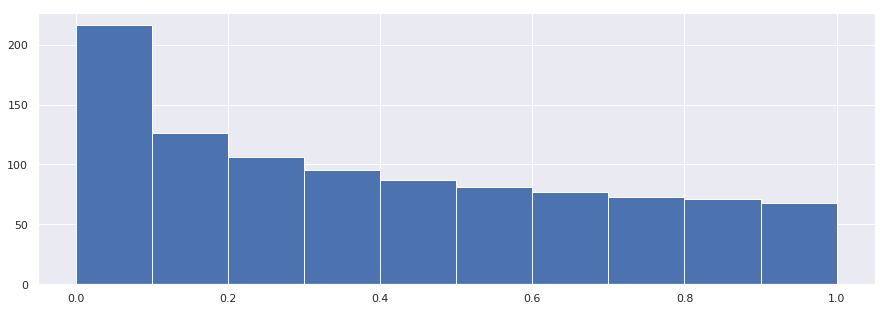

In [10]:
# if you don't put semicolon at the end, you'll have output of function printed
plt.hist(np.linspace(0, 1, 1000)**1.5);

Commenting functions

In [ ]:
def back_test(strategy, seq_len, ticker, start_date, end_date, dim):
    """
    A simple back test for a given date period
    :param strategy: the chosen strategy. Note to have already formed the model, and fitted with training data.
    :param seq_len: length of the days used for prediction
    :param ticker: company ticker
    :param start_date: starting date
    :type start_date: "YYYY-mm-dd"
    :param end_date: ending date
    :type end_date: "YYYY-mm-dd"
    :param dim: dimension required for strategy: 3dim for LSTM and 2dim for MLP
    :type dim: tuple
    :return: Percentage errors array that gives the errors for every test in the given date range
    """
    data = pdr.get_data_yahoo(ticker, start_date, end_date)
    stock_data = data["Adj Close"]
    errors = []
    for i in range((len(stock_data)//10)*10 - seq_len - 1):
        x = np.array(stock_data.iloc[i: i + seq_len, 1]).reshape(dim) / 200
        y = np.array(stock_data.iloc[i + seq_len + 1, 1]) / 200
        predict = strategy.predict(x)
        while predict == 0:
            predict = strategy.predict(x)
        error = (predict - y) / 100
        errors.append(error)
        total_error = np.array(errors)
    print(f"Average error = {total_error.mean()}")

# MAGIC

list available python magics

In [4]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python  %%pyth

You can manage environment variables of your notebook without restarting the jupyter server process. Some libraries (like theano) use environment variables to control behavior, %env is the most convenient way.

In [21]:
from math import pi
%precision 3
pi

3.142

In [22]:
pi*100

314.159

%store: lazy passing data between notebooks

In [13]:
data = 'this is the string I want to pass to different notebook'
%store data
del data # deleted variable

data

Stored 'data' (str)


NameError: name 'data' is not defined

In [15]:
# in second notebook I will use:
%store -r data
print (data)

this is the string I want to pass to different notebook


In [16]:
# measure small code snippets with timeit !
%timeit np.random.normal(size=100)

22.1 µs ± 1.37 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [24]:
%%timeit
np.random.normal(size=100)

17.9 µs ± 2.34 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [25]:
%time np.random.normal(size=100)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 77.2 µs


array([ 0.116,  2.203,  0.069, -0.683, -0.544, -1.09 ,  1.337, -1.361,
        1.335, -1.646, -0.462, -1.323,  0.602,  0.564,  0.53 ,  0.417,
        0.303,  0.161,  1.675, -0.159,  0.384, -0.27 , -0.17 , -0.923,
        1.884,  0.355, -0.526, -0.871,  0.937,  0.83 , -0.114, -0.162,
       -1.213,  0.425,  0.189,  0.617, -1.6  ,  0.402, -0.802, -0.246,
        0.128, -0.04 , -0.497, -0.998, -0.219,  0.409,  1.785,  1.402,
       -0.686,  1.245,  0.037,  1.593, -1.408,  1.275, -0.835,  0.63 ,
        0.469,  0.377,  0.856,  1.137,  1.662,  2.666, -1.268, -0.541,
        0.977,  0.796, -0.595,  0.116,  0.738, -0.771,  0.686,  0.143,
       -0.918, -1.024, -0.046, -1.65 , -1.017, -1.287, -1.311, -0.375,
        0.251,  0.296,  0.552, -0.651,  0.685, -0.699, -0.737, -1.87 ,
       -0.325, -0.146,  0.787, -0.02 , -1.8  ,  1.873, -0.624, -0.697,
       -0.298,  1.4  ,  0.524,  1.21 ])

In [27]:
%%time
np.random.normal(size=100)
np.random.normal(size=100)
np.random.normal(size=100)
np.random.normal(size=100)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 428 µs


In [17]:
# shows how much time program spent in each function
%prun np.random.normal(size=100)

         4 function calls in 0.001 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.001    0.001    0.001    0.001 {method 'normal' of 'mtrand.RandomState' objects}
        1    0.000    0.000    0.001    0.001 {built-in method builtins.exec}
        1    0.000    0.000    0.001    0.001 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}

In [18]:
# tracking memory consumption (show in the pop-up)
%mprun -f np.random.normal(size=100)

UsageError: Line magic function `%mprun` not found.


In [11]:
# you can use ? to get details about magics, for instance:
%pycat?

Docstring:
Show a syntax-highlighted file through a pager.

This magic is similar to the cat utility, but it will assume the file
to be Python source and will show it with syntax highlighting.

This magic command can either take a local filename, an url,
an history range (see %history) or a macro as argument ::

%pycat myscript.py
%pycat 7-27
%pycat myMacro
%pycat http://www.example.com/myscript.py
File:      /opt/conda/lib/python3.6/site-packages/IPython/core/magics/osm.py


In [7]:
%env

{'PATH': '/opt/conda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin',
 'HOSTNAME': 'jupyter-m3nt3',
 'MEM_GUARANTEE': '1073741824',
 'GIT_AUTHOR_NAME': 'm3nt3',
 'JUPYTERHUB_API_TOKEN': 'f5f37577b3274dda8722164ba6fd3d9d',
 'JUPYTERHUB_ADMIN_ACCESS': '1',
 'JUPYTERHUB_OAUTH_CALLBACK_URL': '/user/m3nt3/oauth_callback',
 'JUPYTERHUB_CLIENT_ID': 'jupyterhub-user-m3nt3',
 'JPY_API_TOKEN': 'f5f37577b3274dda8722164ba6fd3d9d',
 'JUPYTERHUB_HOST': '',
 'JUPYTERHUB_USER': 'm3nt3',
 'JUPYTERHUB_API_URL': 'http://100.67.84.6:8081/hub/api',
 'JUPYTER_IMAGE_SPEC': '546056091706.dkr.ecr.eu-west-1.amazonaws.com/jupyterimage:181007',
 'EMAIL': 'm3nt3@local',
 'GIT_COMMITTER_NAME': 'm3nt3',
 'JUPYTERHUB_BASE_URL': '/',
 'JUPYTERHUB_SERVICE_PREFIX': '/user/m3nt3/',
 'PROXY_PUBLIC_SERVICE_PORT_HTTP': '80',
 'PROXY_API_SERVICE_PORT': '8001',
 'KUBERNETES_PORT_443_TCP_PORT': '443',
 'HUB_SERVICE_PORT': '8081',
 'KUBE_LEGO_NGINX_PORT_8080_TCP_ADDR': '100.65.255.73',
 'PROXY_PUBLIC_SERVICE_H